
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, October 22nd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Please ensure that the notebook you have uploaded on Canvas is the correct one, you could download the notebook from Canvas to double check that you have submitted the correct version on your notebook.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Christopher Henson - cgh966
2. Rawini Dias - rwd635

# Question 1 - Stochastic Gradient Descent (30 pts)

1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 5 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3$$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook and upload the image in the submission.


2. (20pts) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3$$ Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y and a choice of update_rule as 'sgd' or 'sgd_momentum' or 'Adagrad'. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD, SGD-Momentum and Adagrad. I.e., you should have one plot of MSE and another for the parameter updates for SGD, SGD-Momentum and Adagrad (6 plots total). (2pts) Report the MSE at the end of 15 epochs for the two best combinations in each of SGD, SGD-Momentum and Adagrad.

Here are two blogs which you can go through to know about Adagrad - [blog 1](https://medium.com/konvergen/an-introduction-to-adagrad-f130ae871827) and [blog 2](http://ruder.io/optimizing-gradient-descent/).


3. (5pts) Based on the experiments, which of the 3 techniques allowed for a larger initial setting of the learning_rate? Why?


## Answer 

### 1.

Answer: 

Given the equation 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3$$

Let us write 

$$
\textbf{w} = 
\begin{bmatrix} 
w_0\\
w_1\\
w_2\\
w_3\\
w_4\\
\end{bmatrix}
$$

and given observations $t_i$ and predictions $y_i$ our loss is

$$
E = \dfrac{1}{2} \sum_{i=1}^n E_i = \dfrac{1}{2} \sum_{i=1}^n (t_i - y_i)^2
$$

Then for our weights we have the iterative updating rule:

$$
\textbf{w}^{\tau+1} = \textbf{w}^{\tau} - \eta \nabla E 
$$

Expanding into matrix form we have:

$$
\begin{bmatrix} 
w_0\\
w_1\\
w_2\\
w_3\\
w_4\\
\end{bmatrix}^{\tau + 1}
=
\begin{bmatrix} 
w_0\\
w_1\\
w_2\\
w_3\\
w_4\\
\end{bmatrix}^{\tau}
-\eta 
\begin{bmatrix} 
\dfrac{\partial}{w_0} \dfrac{1}{2}(t - (w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3))^2\\
\dfrac{\partial}{w_1} \dfrac{1}{2}(t - (w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3))^2\\
\dfrac{\partial}{w_2} \dfrac{1}{2}(t - (w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3))^2\\
\dfrac{\partial}{w_3} \dfrac{1}{2}(t - (w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3))^2\\
\dfrac{\partial}{w_4} \dfrac{1}{2}(t - (w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3))^2\\
\end{bmatrix}^{\tau, i}
$$

and evaluating the partial derivatives:

$$
\begin{bmatrix} 
w_0\\
w_1\\
w_2\\
w_3\\
w_4\\
\end{bmatrix}^{\tau + 1}
=
\begin{bmatrix} 
w_0\\
w_1\\
w_2\\
w_3\\
w_4\\
\end{bmatrix}^{\tau}
+\eta
\begin{bmatrix} 
(t - (w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3))\\
x_1 (t - (w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3))\\
x_1 x_1 (t - (w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3))\\
x_1^2 x_1^2 (t - (w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3))\\
x_2^3 (t - (w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3))\\
\end{bmatrix}^{\tau, i}
$$

where within each epoch $\tau$ this is evaluated through all points in the dataset $x_{1,i}, x_{2,i}$ for $i \in {1, 2, \dots, n}$

### 2.

In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros(5) #one coef for each of the terms
        self.eps = 10**-6 #used only for adagrad
        self.cache = np.zeros(self.coef.shape) #used only for adagrad
        self.mu = 0.9 #used in momentum


        
    def sgd(self, gradient):
        '''
        updates self.coef based on gradient using SGD
        '''
        self.coef = self.coef + (self.learning_rate*gradient - \
                                 self.learning_rate*self.regularization*self.coef)
    
    def adagrad(self, gradient):
        '''
        updates self.coef based on gradient using Adagrad
        '''
        
        self.cache += gradient**2
        self.coef += (self.learning_rate*gradient / (np.sqrt(self.cache)+self.eps) \
                      - self.learning_rate*self.regularization*self.coef)
    
    
    def sgd_momentum(self, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''


        self.cache = self.mu * self.cache + self.learning_rate * self.gradient
        self.coef += (self.cache - self.learning_rate*self.regularization*self.coef)
    
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        
        '''
        Fits the model for the given X, y. It uses the update rule mentioned by the parameter update_rule
        and displays a plot of the coefficients vs epochs and mse vs epochs if plot is True. 

        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the respective update rule and update the coefficients
                keep track of mse and coefficients
        -> plot if required

        '''
        
        features = self.get_features(X) 
        
        self.weight_list = []
        self.mse_list = []
        
        for epoch in range(self.n_epoch):
            self.cache = np.zeros(self.coef.shape)
            for point in range(len(X)):
                prediction = self.linearPredict(features[point])
                loss = y[point] - prediction
                #need to multiply this by the chain rule term aka our features
                gradient = loss*features[point]
                self.gradient = gradient
                
                if update_rule == 'sgd':
                    self.sgd(gradient)
                    
                if update_rule == 'sgd_momentum':
                    self.sgd_momentum(gradient)
                    
                if update_rule == 'adagrad':
                    self.adagrad(gradient)
            
            if plot:
                plt.scatter(epoch, self.coef[0], color = 'blue')
                plt.scatter(epoch, self.coef[1], color = 'red')
                plt.scatter(epoch, self.coef[2], color = 'green')
                plt.scatter(epoch, self.coef[3], color = 'purple')
                plt.scatter(epoch, self.coef[4], color = 'orange')
                plt.title('Weights vs Number of Epochs')
                plt.xlabel('Number of Epochs')
                plt.ylabel('Weights')
    
            
            self.weight_list.append(self.coef)
            self.mse_list.append(np.mean((y - self.linearPredict(features))**2))
            
        plt.show() 
        
        if plot:
            plt.plot(range(self.n_epoch), self.mse_list)
            plt.title('MSE vs Number of Epochs')
            plt.xlabel('Number of Epochs')
            plt.ylabel('MSE')
            plt.show()
            
        
    def get_features(self, X):
        '''
        X (input) is the nx2 dimensional array - n data points with X_1 and X_2.
        It returns a nX5 dimensional array - n data points with 1, X_1, X_1X_2, X_1^2X_2^2, X_2^3.
        '''
        features = pd.DataFrame(X, columns = ['x1', 'x2'])
        features.insert(value = 1, loc = 0, column = 'constant')
        features['x1*x2'] = features['x1']*features['x2']
        features['x1^2*x2^2'] = (features['x1']**2)*(features['x2']**2)
        features['x2^3'] = features['x2']**3
        features.drop(['x2'], axis = 1, inplace = True)
        return features.values
        
    def linearPredict(self, X_features):
        '''
        returns the dot product of X and self.coef
        '''
        prediction = np.dot(X_features, self.coef)
        return prediction

In [2]:
data = pd.read_csv('q1_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [3]:
data

,x1,x2,y
0,0.180270,0.038950,0.256735
1,0.724934,0.840407,0.243037
2,0.012781,0.974743,0.435229
3,0.850795,1.459929,-0.059352
4,0.893904,1.714308,-0.116806
5,0.632334,0.040967,0.096332
6,0.316367,0.315825,0.403593
7,0.818275,0.689249,0.177646
8,0.111661,0.167906,0.378696
9,0.599543,0.111347,0.275355


### Using SGD


In [4]:
%%time
# loop over learning rates and regularization

results = []

for eta in learning_rate:
    for alpha in regularization:
        reg_test = LinearRegression(learning_rate=eta, 
                                    regularization=alpha, 
                                    n_epoch=15)

        reg_test.fit(X, y, plot = False, update_rule = 'sgd')

        best_epoch = reg_test.mse_list.index(min(reg_test.mse_list))
        mse = reg_test.mse_list[best_epoch]
        w = reg_test.weight_list[best_epoch]
          
        results.append((eta, alpha, mse))

c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in multiply
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in add
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:100: RuntimeWarning: overflow encountered in square
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:76: RuntimeWarning: overflow encountered in multiply
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in multiply


Wall time: 788 ms


In [5]:
results.sort(key=itemgetter(2), reverse=False)
results

[(0.001, 0, 0.020878097917959082),
 (0.01, 0, 0.021781768945026436),
 (0.0001, 0, 0.03542985697484228),
 (0.001, 10, 0.057526308390847776),
 (0.0001, 10, 0.05755104171698528),
 (0.1, 10, 0.057850741844396876),
 (0.01, 10, 0.0583709859910493),
 (0.001, 100, 0.06345819504611241),
 (0.01, 100, 0.0636451669013845),
 (0.0001, 100, 0.06368389348018229),
 (0.1, 0, 38705585638151.2),
 (0.1, 100, nan),
 (1, 0, inf),
 (1, 10, nan),
 (1, 100, nan),
 (10, 0, nan),
 (10, 10, nan),
 (10, 100, nan),
 (100, 0, nan),
 (100, 10, nan),
 (100, 100, nan)]

## Best SGD

In [6]:
print('Best Learning Rate:', results[0][0])
print('Best Regularization:', results[0][1])

Best Learning Rate: 0.001
Best Regularization: 0


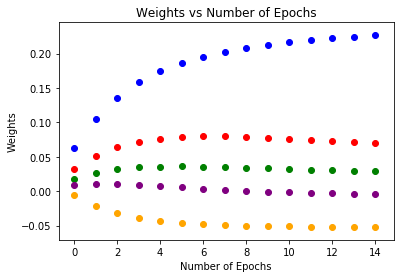

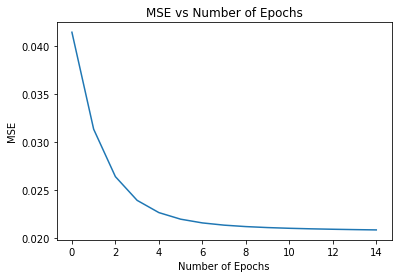

In [7]:
reg_test = LinearRegression(learning_rate = results[0][0], 
                            regularization = results[0][1], 
                            n_epoch=15)

reg_test.fit(X, y, plot = True, update_rule = 'sgd')

In [8]:
best_epoch = reg_test.mse_list.index(min(reg_test.mse_list))

print('Best Epoch:', best_epoch)
print('Best MSE:', reg_test.mse_list[best_epoch])
print('Best Coefficients', reg_test.weight_list[best_epoch])

Best Epoch: 14
Best MSE: 0.020878097917959082
Best Coefficients [ 0.22659281  0.06990735  0.02899178 -0.00361871 -0.05184257]


## Second Best SGD

In [9]:
print('Second Best Learning Rate:', results[1][0])
print('Second Best Regularization:', results[1][1])

Second Best Learning Rate: 0.01
Second Best Regularization: 0


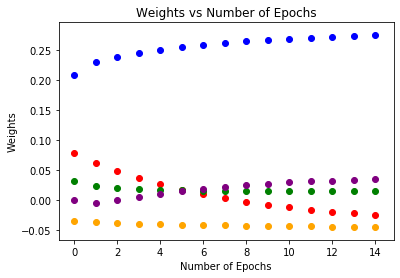

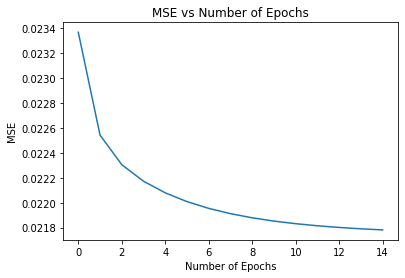

In [10]:
reg_test = LinearRegression(learning_rate = results[1][0], 
                            regularization = results[1][1], 
                            n_epoch=15)

reg_test.fit(X, y, plot = True, update_rule = 'sgd')

In [11]:
best_epoch = reg_test.mse_list.index(min(reg_test.mse_list))

print('Best Epoch:', best_epoch)
print('Best MSE:', reg_test.mse_list[best_epoch])
print('Best Coefficients', reg_test.weight_list[best_epoch])

Best Epoch: 14
Best MSE: 0.021781768945026436
Best Coefficients [ 0.27493739 -0.0246193   0.01559034  0.03467884 -0.04480176]


### Using SGD-Momentum

In [12]:
%%time
# loop over learning rates and regularization

results = []

for eta in learning_rate:
    for alpha in regularization:
        reg_test = LinearRegression(learning_rate=eta, 
                                    regularization=alpha, 
                                    n_epoch=15)

        reg_test.fit(X, y, plot = False, update_rule = 'sgd_momentum')

        best_epoch = reg_test.mse_list.index(min(reg_test.mse_list))
        mse = reg_test.mse_list[best_epoch]
        w = reg_test.weight_list[best_epoch]
          
        results.append((eta, alpha, mse))

c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:100: RuntimeWarning: overflow encountered in square
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:76: RuntimeWarning: overflow encountered in multiply
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in add
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in multiply
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in add
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:45: Runtime

Wall time: 1.07 s


In [13]:
results.sort(key=itemgetter(2), reverse=False)
results

[(0.001, 0, 0.020273688696143415),
 (0.0001, 0, 0.020893420872503076),
 (0.0001, 10, 0.03552167158227556),
 (0.001, 10, 0.036474457824599904),
 (0.01, 10, 0.04240869519978662),
 (0.0001, 100, 0.05762385084073821),
 (0.001, 100, 0.05819029716913022),
 (0.01, 100, 0.0583709859910493),
 (0.1, 10, 0.08386088574714291),
 (0.01, 0, 0.12023518515811576),
 (0.1, 0, 4.4041450898113357e+104),
 (0.1, 100, nan),
 (1, 0, inf),
 (1, 10, nan),
 (1, 100, nan),
 (10, 0, nan),
 (10, 10, nan),
 (10, 100, nan),
 (100, 0, nan),
 (100, 10, nan),
 (100, 100, nan)]

## Best SGD Momentum:

In [14]:
print('Best Learning Rate:', results[0][0])
print('Best Regularization:', results[0][1])

Best Learning Rate: 0.001
Best Regularization: 0


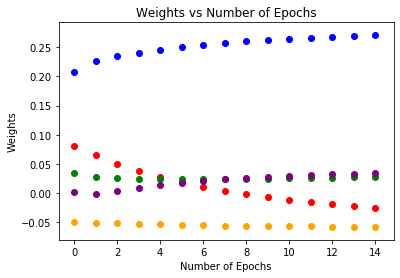

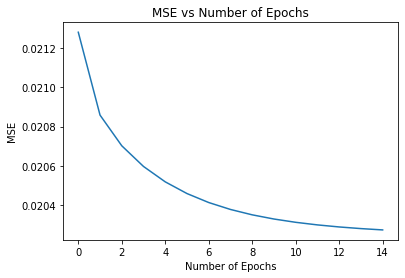

In [15]:
reg_test = LinearRegression(learning_rate = results[0][0], 
                            regularization = results[0][1], 
                            n_epoch=15)

reg_test.fit(X, y, plot = True, update_rule = 'sgd_momentum')

In [16]:
best_epoch = reg_test.mse_list.index(min(reg_test.mse_list))

print('Best Epoch:', best_epoch)
print('Best MSE:', reg_test.mse_list[best_epoch])
print('Best Coefficients', reg_test.weight_list[best_epoch])

Best Epoch: 14
Best MSE: 0.020273688696143415
Best Coefficients [ 0.27066214 -0.02479731  0.02735505  0.03422007 -0.05805732]


## Second Best SGD Momentum

In [17]:
print('Second Best Learning Rate:', results[1][0])
print('Second Best Regularization:', results[1][1])

Second Best Learning Rate: 0.0001
Second Best Regularization: 0


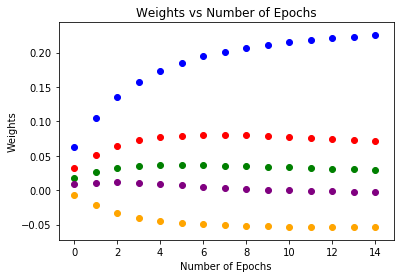

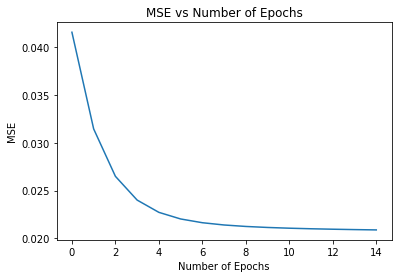

In [18]:
reg_test = LinearRegression(learning_rate = results[1][0], 
                            regularization = results[1][1], 
                            n_epoch=15)

reg_test.fit(X, y, plot = True, update_rule = 'sgd_momentum')

In [19]:
best_epoch = reg_test.mse_list.index(min(reg_test.mse_list))

print('Best Epoch:', best_epoch)
print('Best MSE:', reg_test.mse_list[best_epoch])
print('Best Coefficients', reg_test.weight_list[best_epoch])

Best Epoch: 14
Best MSE: 0.020893420872503076
Best Coefficients [ 0.22512277  0.07106466  0.02985466 -0.00226921 -0.05338281]


### Using Adagrad

In [20]:
%%time
# loop over learning rates and regularization

results = []

for eta in learning_rate:
    for alpha in regularization:
        reg_test = LinearRegression(learning_rate=eta, 
                                    regularization=alpha, 
                                    n_epoch=15)
        
        reg_test.fit(X, y, plot = False, update_rule = 'adagrad')

        best_epoch = reg_test.mse_list.index(min(reg_test.mse_list))
        mse = reg_test.mse_list[best_epoch]
        w = reg_test.weight_list[best_epoch]
          
        results.append((eta, alpha, mse))

c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in square
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in multiply
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:76: RuntimeWarning: overflow encountered in multiply
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in multiply


Wall time: 1.39 s


In [21]:
results.sort(key=itemgetter(2), reverse=False)
results

[(0.01, 0, 0.020237023666423312),
 (0.1, 0, 0.02192247226541079),
 (0.001, 0, 0.022070155570444634),
 (1, 0, 0.036600821108234524),
 (10, 0, 0.04148908283267201),
 (100, 0, 0.042764091248716656),
 (0.0001, 0, 0.04745127877443339),
 (0.0001, 10, 0.061338451183022925),
 (0.001, 10, 0.06240297425462433),
 (0.01, 10, 0.06242705991224058),
 (0.1, 10, 0.06290385982211892),
 (0.0001, 100, 0.06447636998297636),
 (0.001, 100, 0.06448492659052567),
 (0.01, 100, 0.06453108397319292),
 (0.1, 100, nan),
 (1, 10, nan),
 (1, 100, nan),
 (10, 10, nan),
 (10, 100, nan),
 (100, 10, nan),
 (100, 100, nan)]

 ## Best Adagrad

In [22]:
print('Best Learning Rate:', results[0][0])
print('Best Regularization:', results[0][1])

Best Learning Rate: 0.01
Best Regularization: 0


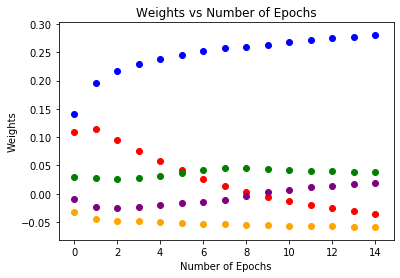

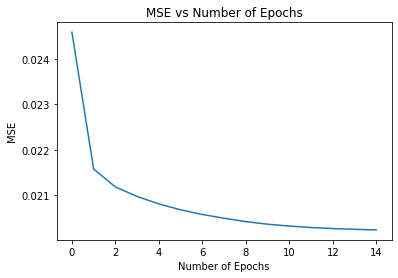

In [23]:
reg_test = LinearRegression(learning_rate = results[0][0], 
                            regularization = results[0][1], 
                            n_epoch=15)

reg_test.fit(X, y, plot = True, update_rule = 'adagrad')

In [24]:
best_epoch = reg_test.mse_list.index(min(reg_test.mse_list))

print('Best Epoch:', best_epoch)
print('Best MSE:', reg_test.mse_list[best_epoch])
print('Best Coefficients', reg_test.weight_list[best_epoch])

Best Epoch: 14
Best MSE: 0.020237023666423312
Best Coefficients [ 0.28034674 -0.03578006  0.03831064  0.01976377 -0.05881467]


 ## Second Best Adagrad

In [25]:
print('Second Best Learning Rate:', results[1][0])
print('Second Best Regularization:', results[1][1])

Second Best Learning Rate: 0.1
Second Best Regularization: 0


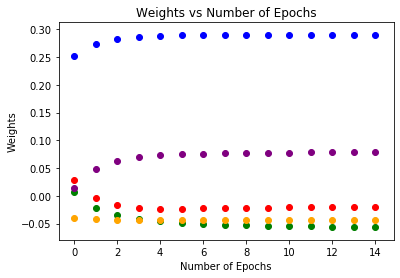

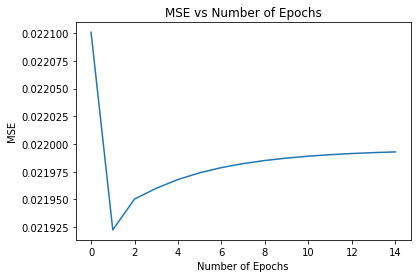

In [26]:
reg_test = LinearRegression(learning_rate = results[1][0], 
                            regularization = results[1][1], 
                            n_epoch=15)

reg_test.fit(X, y, plot = True, update_rule = 'adagrad')

In [27]:
best_epoch = reg_test.mse_list.index(min(reg_test.mse_list))

print('Best Epoch:', best_epoch)
print('Best MSE:', reg_test.mse_list[best_epoch])
print('Best Coefficients', reg_test.weight_list[best_epoch])

Best Epoch: 1
Best MSE: 0.02192247226541079
Best Coefficients [ 0.28957479 -0.02034838 -0.05604126  0.07871856 -0.04363237]


### 3.

Ans.


Best Learning Rate:<br />
SGD: 0.001<br />
SGD_momentum: 0.001<br />
Adagrad: 0.01<br />

Adagrad had the higher initial learning rate. Adagrad uses a different learning rate for every parameter at every time step based on the frequency of the feature associated with each parameter. 

Additionally, Adagrad updates our weights using the square of the gradient, as opposed to just the gradient itself. This allows for an initial setting of a larger learning rate since squaring reduces our overal scale.

# 2.  Tensor Playground (25pts)
Visit http://playground.tensorflow.org for this problem

From the far right, select "Classification" as the problem type, and select the 4th of the four data sets (the spiral data which is bottom right).  

1) Use the following default settings - test/training ratio 50%, Noise 0, Batch Size 10, learning rate 0.03, one hidden layer with 4 neurons, input as X_1, X_2 and no Regularization. Run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs(4 values). What difference do you observe in the decision boundary? Why? (4 pts)

2) Use the above setting, set the activation to be Tanh and learning rate to be 0.03. Report the train, test losses at the end of 1000 epochs for 2, 4, and 8 neurons in the hidden layer (6 values). What do you observe in the decision boundary as the number of neurons increases? Why? (4 pts)

3) Use the above setting, set the activation to be Tanh and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 3, 0.3, 0.03 and 0.003 (8 values). What do you observe in the loss curves? Explain. (4 pts)

4) Use the above setting, set the activation to be Tanh and learning rate to be 0.03. Use two hidden layers - first hidden layer with 6 neurons and second hidden layer with 4 neurons. Report the train, test values at the end of 2000 epochs (2 values) and attach the screenshot from Tensor playground. Explain the changes you see with this additional hidden layer. (5 pts).

5) Fix the test/training ratio 50% and Noise to 0 (same as before). Play around with any of the other hyperparameters, network architectures and input features (such as $sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be atmost 0.06). Attach the screenshot from  Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc.  (8 pts)
 

### ANSWER

In [28]:
from IPython.display import Image

### 1. 


**With Tanh:** Test loss = 0.422 ; Train loss = 0.376

**With Linear:** Test loss = 0.468 ; Train loss = 0.477

The linear activation fuction used a linear decision boundary which does not do well in separating the classes.
The tanh activation function used a decision boundary that attempted to contour to the class separation in the spiral. While it could not achieve a good decision boundary, it did much better tahn the linear activation function.

### 2. 

**2 Neurons:**
Test loss = 0.471 ; Train loss = 0.478

**4 Neurons:**
Test loss = 0.442 ; Train loss = 0.383

**8 Neurons:**
Test loss = 0.345 ; Train loss = 0.217

Based on the above results, it is apparent that as the number of neurons in the hidden layer increases, the neural network does a better job of separating the classes. However, there will come a point where the model is overfitting the data.

The decision boundary for the 2 neuron hidden layer was almost linear, thus not achieving the worst separation of classes. The decision boundary of 4 neurons contoured better to the shape of the data and that with 8 neurons did an even better job in separating the classes. However, looking at the decision boundary for the 8 neurons, it becomes apparent that the model will soon overfit the data.

### 3.

**Learning Rate = 3:**<br />
100 epochs: Test loss = 0.518 ; Train loss = 0.563<br />
1000 epochs: Test loss = 0.561 ; Train loss = 0.631

**Learning Rate = 0.3:**<br />
100 epochs: Test loss = 0.483 ; Train loss = 0.469<br />
1000 epochs: Test loss = 0.480 ; Train loss = 0.372

**Learning Rate = 0.03:**<br />
100 epochs: Test loss = 0.491 ; Train loss = 0.464<br />
1000 epochs: Test loss = 0.419 ; Train loss = 0.372

**Learning Rate = 0.003:**<br />
100 epochs: Test loss = 0.474 ; Train loss = 0.472<br />
1000 epochs: Test loss = 0.485 ; Train loss = 0.466

For the learning rate of 3, the loss curve is jagged indicating that the learning rate is too high and that the gradient descent is diverging. The learning rate of 0.003 seems to be too slow, converging very slowly, which is why its train and test loss is higher than those for the learning rates of 0.3 and 0.03. 

### 4.

Test loss = 0.262<br />
Train loss = 0.211

The additional hidden layer achieves an overall better classification train and test loss compared to the single hidden layer used above.

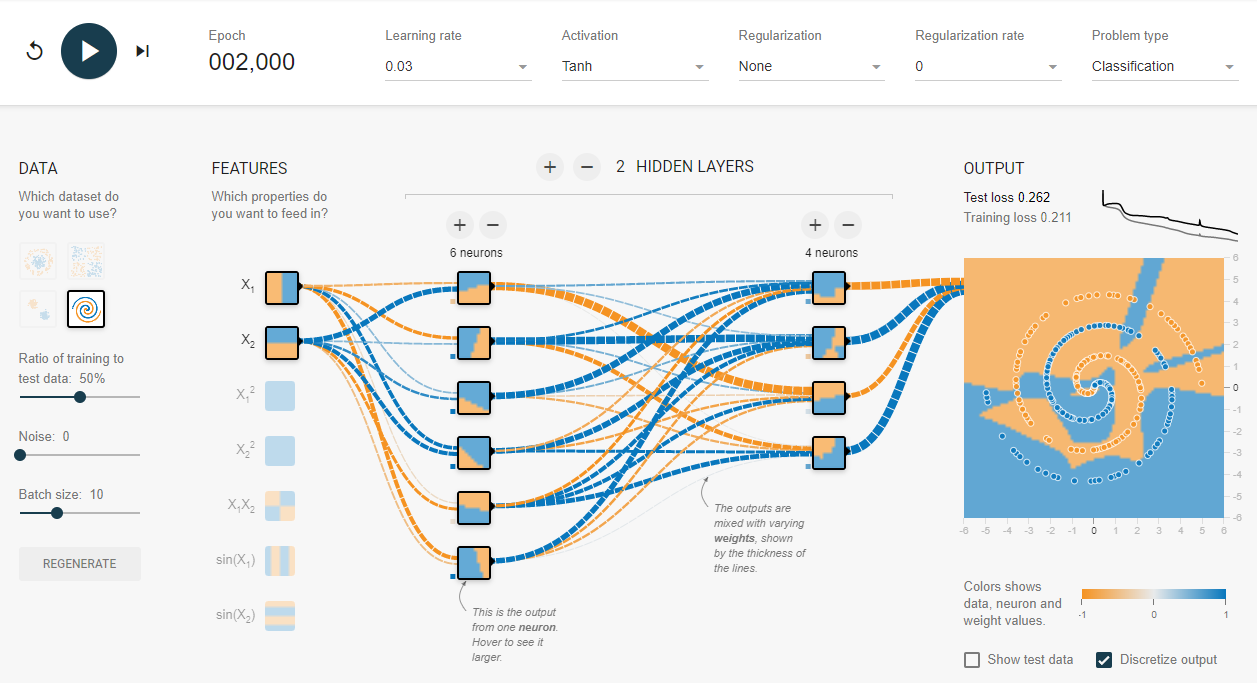

In [29]:
#PART 2
from IPython.display import Image
Image("q2_4.png")

### 5.

The model using X1, X2, X1^2, X2^2, sin(X2) achieved a test loss of 0.06 and a training loss of 0.024 using a hidden layer of 5 neurons, a second hidden layer of 4 neurons, and 645 epochs.<br />
Adding more neurons to each layer would have enabled other models to also achieve similar test loss but the model would be more complex at that point.<br />
Also, using all the given features would have enabled the model to achieve a much lower test loss much faster. However, the model would be significantly more complex and overfitted.

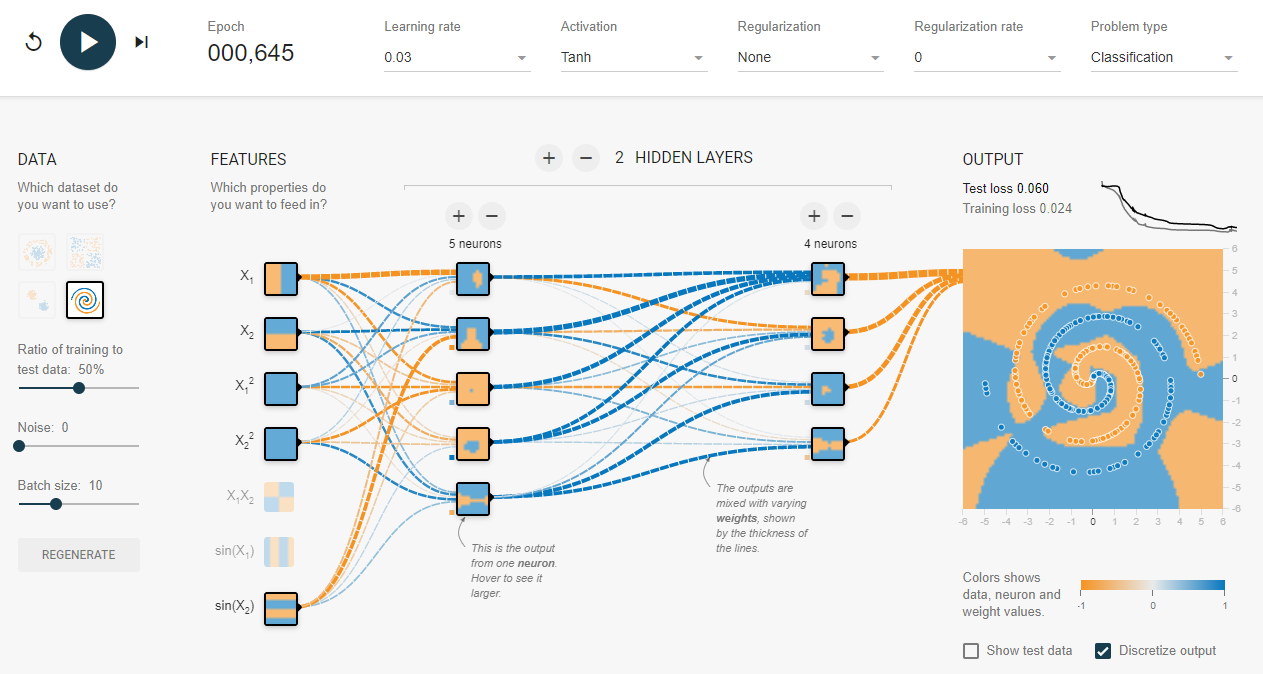

In [30]:
Image("q2_5.png")

# Question 3: Decision Trees

1. (5pts) In this question, we will learn to build a Decision Tree classifier. Load the q3_dataset.csv from the files. The column named 'label' is the $Y$ we are trying to predict using the features given in all other columns. As usual, we first split the data in a train and test set and build our model on train set and test the performance on the test set. Use the class tree.DecisionTreeClassifier (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) to fit a model with default parameters and report its performance on the test data. Now, visualize the tree, for visualisation, if your classifier object is called clf, use the given commands to save the generated tree as a '.dot' file using export_graphviz(https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) and paste the contents of the file in Webgraphviz (http://www.webgraphviz.com/) to generate the tree.


In [31]:
## read data
data= pd.read_csv('q3_dataset.csv')
x = data.drop(['label'],axis=1)
y = data.label.values

In [32]:
## create train/test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [33]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [34]:
#test accuracy
clf.score(x_test, y_test)

0.9385964912280702

In [35]:
## save tree as .dot
from sklearn import tree

with open("graphviz.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

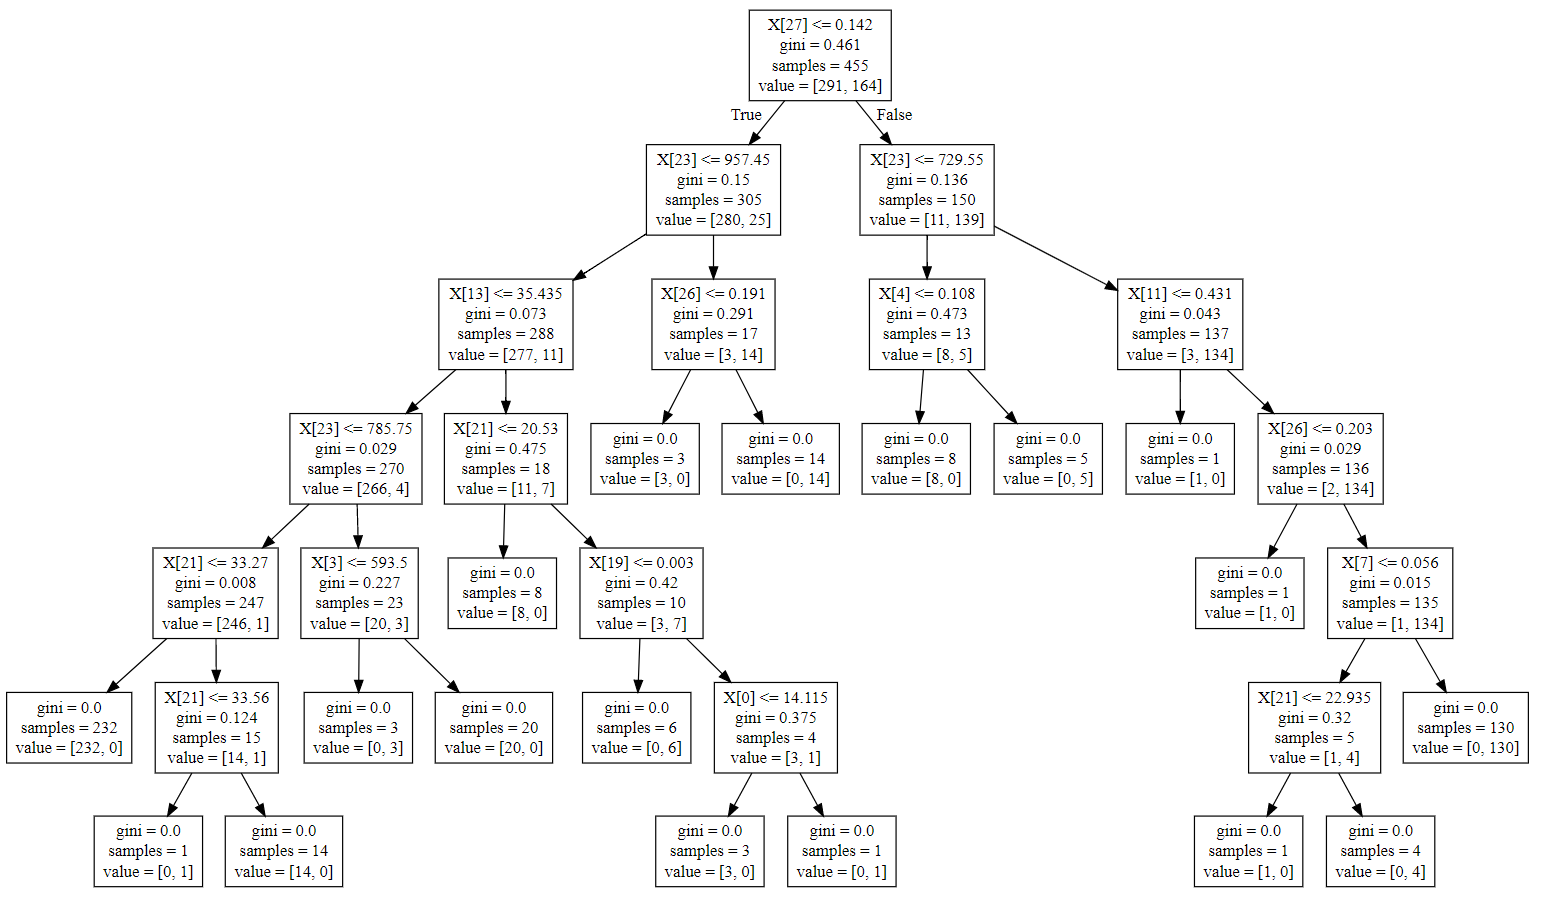

In [36]:
Image('q3.png')

2. (10pts) We can guide the learning of a Decision Tree classifier by specifying various parameters governing its construction. For example, the max_depth parameter forces the algorithm to stop after at most that many levels, the min_samples_split parameter lower bounds the amount of data required to split nodes when learning and the parameter called criterion determines what function to use to create splits at each node. For both type of criteria, gini and entropy, test the max_depth values in the range 1, 2, ..., 20 , and min_samples_split in the range $2^{1}, 2^{2}, ..., 2^{15}$. Visualise the best classification trees that you get for different criterion parameter and observe how do they differ. 

In [37]:
max_depth = np.linspace(1, 20, num=20, dtype=int)
max_depth

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [38]:
min_samples_split = np.logspace(1, 15, base = 2, num = 15, dtype=int)
min_samples_split

array([    2,     4,     8,    16,    32,    64,   128,   256,   512,
        1024,  2048,  4096,  8192, 16384, 32768])

Gini:

In [39]:
result = []

from sklearn.tree import DecisionTreeClassifier

for depth in max_depth:
    for split in min_samples_split:
        clf = DecisionTreeClassifier(random_state=0, 
                                     criterion='gini', 
                                     min_samples_split = split,
                                     max_depth = depth)
        
        clf.fit(x_train, y_train)
        accuracy = clf.score(x_test, y_test)
        
        result.append((depth, split, accuracy))

In [40]:
from operator import itemgetter

result.sort(key=itemgetter(2), reverse=True)
result[0]

(2, 256, 0.9736842105263158)

In [41]:
tuned_clf = DecisionTreeClassifier(random_state=0, 
                                   criterion='gini', 
                                   min_samples_split = result[0][1],
                                   max_depth = result[0][0])

tuned_clf.fit(x_train, y_train)

with open("graphviz_tuned_gini.dot", 'w') as f:
    f = tree.export_graphviz(tuned_clf, out_file=f)

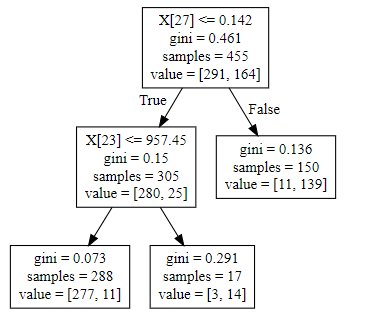

In [42]:
Image('tuned_gini.png')

With Loop:

In [43]:
result = []

from sklearn.tree import DecisionTreeClassifier

for depth in max_depth:
    for split in min_samples_split:
        clf = DecisionTreeClassifier(random_state=0, 
                                     criterion='entropy', 
                                     min_samples_split = split,
                                     max_depth = depth)
        
        clf.fit(x_train, y_train)
        accuracy = clf.score(x_test, y_test)
        
        result.append((depth, split, accuracy))

In [44]:
from operator import itemgetter

result.sort(key=itemgetter(2), reverse=True)
result[0]

(3, 32, 0.9649122807017544)

In [45]:
tuned_clf = DecisionTreeClassifier(random_state=0, 
                                   criterion='entropy', 
                                   min_samples_split = result[0][1],
                                   max_depth = result[0][0])

tuned_clf.fit(x_train, y_train)

with open("graphviz_tuned_entropy.dot", 'w') as f:
    f = tree.export_graphviz(tuned_clf, out_file=f)

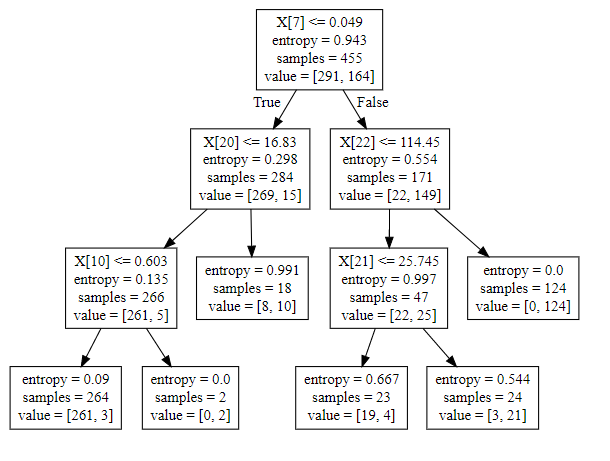

In [46]:
Image('tuned_entropy.png')

Entropy has larger depth but smaller min-split compared to gini.

## Question 4: Bayes Optimal Classification (5 pts)

1. Consider the following classification problem with only one input feature. We have two biased coins, coin 1 and 2. For coin 1, $P(heads) = p$ and for coin 2, $P(heads) = q$. We know that $p > q$. Given the output of a coin toss, we have to predict which coin was used for this toss. Assume we select both the coins for tossing with equal probability. What is the Bayes optimal classifier and what is its error rate?

The below probability tree visualizes this scenario:

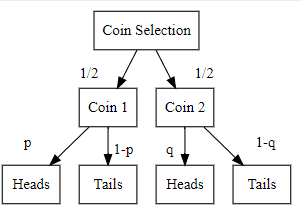

In [47]:
Image('bayes_tree.png')

So we have the probabilities:

$P(\text{Coin 1} \cap \text{heads}) = \dfrac{1}{2} p$

$P(\text{Coin 2} \cap \text{heads}) = \dfrac{1}{2} (1-p)$

$P(\text{Coin 1} \cap \text{tails}) = \dfrac{1}{2} q$

$P(\text{Coin 2} \cap \text{tails}) = \dfrac{1}{2} (1-q)$

Which gives the conditionals:
    
$P(\text{Coin 1}|\text{heads}) = \dfrac{p}{p+q}$ 

$P(\text{Coin 2}|\text{heads}) = \dfrac{q}{p+q}$ 

$P(\text{Coin 1}|\text{tails}) = \dfrac{1-p}{(1-p)+(1-q)}$ 

$P(\text{Coin 2}|\text{tails}) = \dfrac{1-q}{(1-p)+(1-q)}$ 

So for heads, we will predict coin 1 with error:

$\dfrac{q}{p+q}$ 

and for tails we will predict coin 2 with error:

$\dfrac{1-p}{(1-p)+(1-q)}$ 